Kelompok 11 (PREDIKSI HARGA SAHAM PT. XLSMART Telecom Sejahtera Tbk)
Intan Adha Maharani &
Rahma Aliya

1 – Ambil dan Tampilkan Data Saham dari Yahoo Finance

In [8]:
import yfinance as yf
import pandas as pd

# Ambil data saham PT XL Axiata (kode: EXCL.JK)
ticker = "EXCL.JK"
data = yf.download(ticker, start="2018-01-01", end="2024-12-31")

# Tampilkan beberapa baris awal
print(data.head())

# Fokus pada harga penutupan (Close)
data = data[['Close']]

# Tampilkan 5 data terakhir
print("Data Saham EXCL (Harga Penutupan):")
print(data.tail())


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open   Volume
Ticker          EXCL.JK      EXCL.JK      EXCL.JK      EXCL.JK  EXCL.JK
Date                                                                   
2018-01-01  2622.394043  2622.394043  2622.394043  2622.394043        0
2018-01-02  2551.518066  2657.831319  2542.658629  2657.831319  3933100
2018-01-03  2586.956055  2586.956055  2524.939985  2569.237178  3648800
2018-01-04  2586.956055  2586.956055  2533.799423  2586.956055  5236700
2018-01-05  2666.690674  2702.128424  2551.517987  2551.517987  5863100
Data Saham EXCL (Harga Penutupan):
Price             Close
Ticker          EXCL.JK
Date                   
2024-12-20  2191.183594
2024-12-23  2191.183594
2024-12-24  2171.962646
2024-12-27  2162.352295
2024-12-30  2162.352295


proses forecasting atau peramalan harga saham menggunakan data historis dari saham PT XL Axiata Tbk (kode saham: EXCL). Fokus utama prediksi adalah harga penutupan harian (closing price) saham tersebut. Data historis ini terlebih dahulu diolah dan dinormalisasi, lalu dibentuk dalam format urutan (sequence) untuk memodelkan hubungan waktu, di mana 10 hari terakhir yang di mulai dari tanggal 20-12-2024 sampai tanggal 30-12-2024 datanya digunakan sebagai input untuk memprediksi harga pada hari ke-11. Dengan pendekatan digunakan untuk  mencoba menangkap pola atau tren dari pergerakan harga saham dalam jangka pendek.

2- Normalisasi dan Pembentukan Data Time Series

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalisasi
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Buat sequence: 10 hari ke belakang → prediksi 1 hari ke depan
def create_sequence(data, n_steps=10):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

n_steps = 10
X, y = create_sequence(data_scaled, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

print(f"Shape X: {X.shape}, Shape y: {y.shape}")
print("Contoh X[0]:", X[0].flatten())
print("Target y[0]:", y[0])


Shape X: (1720, 10, 1), Shape y: (1720,)
Contoh X[0]: [0.70135754 0.66515822 0.68325788 0.68325788 0.72398169 0.81447926
 0.87782783 0.82352921 0.85067858 0.80995453]
Target y[0]: 0.8009048210863563


proses normalisasi menggunakan metode Min-Max Scaling dengan tujuan untuk mengubah skala data harga saham menjadi nilai antara 0 dan 1.

 3 – Split Data ke Train dan Test

In [10]:
# Split 80% train, 20% test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 1376
Jumlah data uji: 344


Dataset dibagi menjadi dua bagian, yaitu 1.376 data latih dan 344 data uji, dengan rasio 80:20. Data latih digunakan untuk melatih model, sementara data uji digunakan untuk mengukur kemampuan model dalam memprediksi data yang belum pernah dilihat sebelumnya. Pembagian ini penting untuk memastikan model tidak hanya menghafal data, tetapi juga mampu melakukan generalisasi.

4 – Latih Model GRU

In [11]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# GRU model
model_gru = Sequential()
model_gru.add(GRU(64, return_sequences=False, input_shape=(n_steps, 1)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Prediksi GRU
y_pred_gru = model_gru.predict(X_test)
print("Prediksi GRU selesai. Contoh output:")
print(y_pred_gru[:5].flatten())


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1374
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 16/20
43/43 ━━━━━━━━━━━━

5-– Buat dan Latih Model Bi-GRU

In [12]:
from keras.layers import Bidirectional

# Bi-GRU model
model_bigru = Sequential()
model_bigru.add(Bidirectional(GRU(64), input_shape=(n_steps, 1)))
model_bigru.add(Dense(1))
model_bigru.compile(optimizer='adam', loss='mse')
model_bigru.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Prediksi Bi-GRU
y_pred_bigru = model_bigru.predict(X_test)
print("Prediksi Bi-GRU selesai. Contoh output:")
print(y_pred_bigru[:5].flatten())


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1056
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 16/20
43/43 ━━━━━━━━━━━━

6 – Buat dan Latih Model Stacked GRU

In [13]:
# Stacked GRU model
model_stacked = Sequential()
model_stacked.add(GRU(64, return_sequences=True, input_shape=(n_steps, 1)))
model_stacked.add(GRU(32))
model_stacked.add(Dense(1))
model_stacked.compile(optimizer='adam', loss='mse')
model_stacked.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Prediksi Stacked GRU
y_pred_stacked = model_stacked.predict(X_test)
print("Prediksi Stacked GRU selesai. Contoh output:")
print(y_pred_stacked[:5].flatten())



Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0597
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 16/20
43/43 ━

7 – Evaluasi dan Visualisasi Hasil

GRU - MAE: 33.76
GRU - RMSE: 47.09
GRU - MAPE: 1.58%


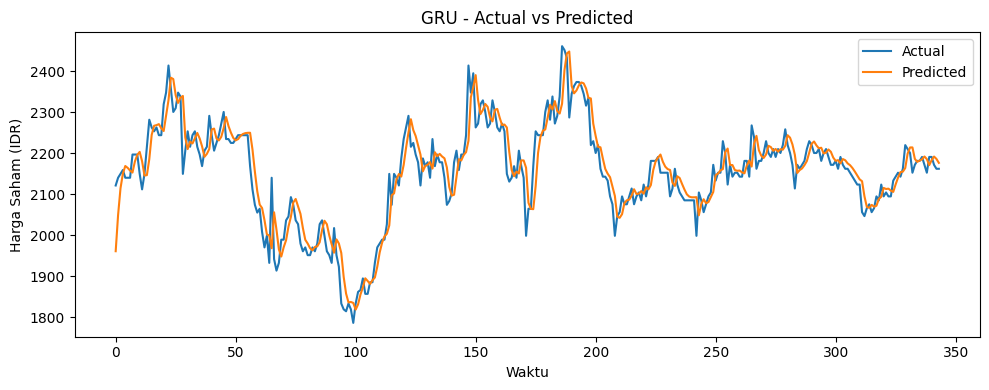

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt

# Invers transform hasil
y_true_gru = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_gru_inv = scaler.inverse_transform(y_pred_gru.reshape(-1, 1))

# Evaluasi MAE
mae_gru = mean_absolute_error(y_true_gru, y_pred_gru_inv)
print(f"GRU - MAE: {mae_gru:.2f}")

# Evaluasi RMSE
rmse_gru = math.sqrt(mean_squared_error(y_true_gru, y_pred_gru_inv))
print(f"GRU - RMSE: {rmse_gru:.2f}")

# Evaluasi MAPE
mape_gru = np.mean(np.abs((y_true_gru - y_pred_gru_inv) / y_true_gru)) * 100
print(f"GRU - MAPE: {mape_gru:.2f}%")

# Visualisasi
plt.figure(figsize=(10, 4))
plt.plot(y_true_gru, label="Actual")
plt.plot(y_pred_gru_inv, label="Predicted")
plt.title("GRU - Actual vs Predicted")
plt.xlabel("Waktu")
plt.ylabel("Harga Saham (IDR)")
plt.legend()
plt.tight_layout()
plt.show()


Model GRU menunjukkan performa prediksi yang sangat baik dengan nilai MAE sebesar 33.76, RMSE sebesar 47.09, dan MAPE hanya 1.58%, yang menandakan tingkat kesalahan relatif yang sangat rendah. Grafik prediksi terhadap data aktual juga menunjukkan bahwa kurva hasil prediksi mengikuti pola data aktual dengan sangat rapat, hampir sejajar di sepanjang waktu. Hal ini mengindikasikan bahwa model GRU mampu menangkap pola fluktuasi harga saham dengan akurasi tinggi dan stabil, baik dalam tren naik maupun turun.

Bi-GRU - MAE: 34.62
Bi-GRU - RMSE: 48.40
Bi-GRU - MAPE: 1.61%


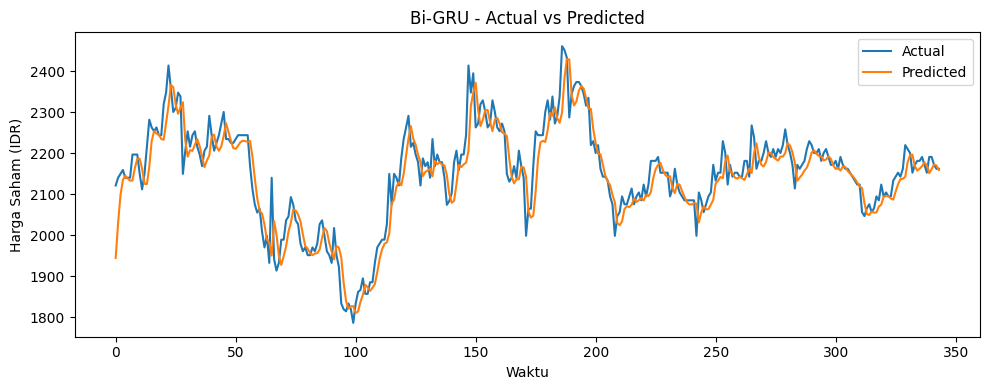

In [15]:
# Invers transform hasil
y_pred_bigru_inv = scaler.inverse_transform(y_pred_bigru.reshape(-1, 1))

# MAE
mae_bigru = mean_absolute_error(y_true_gru, y_pred_bigru_inv)
print(f"Bi-GRU - MAE: {mae_bigru:.2f}")

# RMSE
rmse_bigru = math.sqrt(mean_squared_error(y_true_gru, y_pred_bigru_inv))
print(f"Bi-GRU - RMSE: {rmse_bigru:.2f}")

# MAPE
mape_bigru = np.mean(np.abs((y_true_gru - y_pred_bigru_inv) / y_true_gru)) * 100
print(f"Bi-GRU - MAPE: {mape_bigru:.2f}%")

# Visualisasi
plt.figure(figsize=(10, 4))
plt.plot(y_true_gru, label="Actual")
plt.plot(y_pred_bigru_inv, label="Predicted")
plt.title("Bi-GRU - Actual vs Predicted")
plt.xlabel("Waktu")
plt.ylabel("Harga Saham (IDR)")
plt.legend()
plt.tight_layout()
plt.show()


 hasil prediksi harga saham menggunakan model Bi-GRU (Bidirectional Gated Recurrent Unit). Grafik memperlihatkan perbandingan antara data aktual dan hasil prediksi model. Dari visualisasi terlihat bahwa garis prediksi mengikuti pola data aktual dengan sangat baik. Nilai evaluasi performa model juga menunjukkan akurasi yang tinggi, dengan MAE sebesar 34.62, RMSE sebesar 48.49, dan MAPE hanya 1.61%. Ini menandakan bahwa model Bi-GRU mampu memprediksi harga saham dengan tingkat kesalahan yang sangat rendah dan performa yang konsisten.

Stacked GRU - MAE: 35.08
Stacked GRU - RMSE: 47.91
Stacked GRU - MAPE: 1.64%


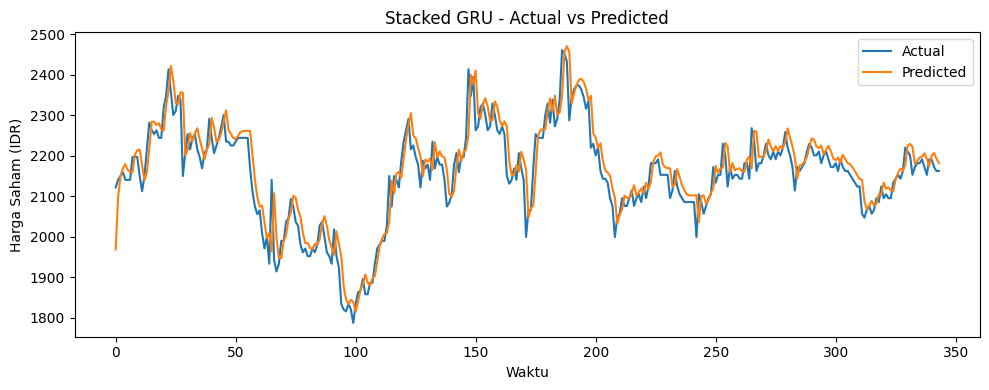

In [16]:
# Invers transform hasil
y_pred_stacked_inv = scaler.inverse_transform(y_pred_stacked.reshape(-1, 1))

# MAE
mae_stacked = mean_absolute_error(y_true_gru, y_pred_stacked_inv)
print(f"Stacked GRU - MAE: {mae_stacked:.2f}")

# RMSE
rmse_stacked = math.sqrt(mean_squared_error(y_true_gru, y_pred_stacked_inv))
print(f"Stacked GRU - RMSE: {rmse_stacked:.2f}")

# MAPE
mape_stacked = np.mean(np.abs((y_true_gru - y_pred_stacked_inv) / y_true_gru)) * 100
print(f"Stacked GRU - MAPE: {mape_stacked:.2f}%")

# Visualisasi
plt.figure(figsize=(10, 4))
plt.plot(y_true_gru, label="Actual")
plt.plot(y_pred_stacked_inv, label="Predicted")
plt.title("Stacked GRU - Actual vs Predicted")
plt.xlabel("Waktu")
plt.ylabel("Harga Saham (IDR)")
plt.legend()
plt.tight_layout()
plt.show()


hasil prediksi harga saham menggunakan model Stacked GRU. Grafik memperlihatkan perbandingan antara nilai aktual dan hasil prediksi, yang menunjukkan bahwa model mampu mengikuti tren data dengan cukup baik. Nilai evaluasi performa menunjukkan MAE sebesar 35.08, RMSE sebesar 47.91, dan MAPE sebesar 1.64%. Meskipun hasilnya mendekati akurasi model Bi-GRU sebelumnya, Stacked GRU sedikit kalah dalam hal akurasi prediksi. Secara keseluruhan, model ini tetap menunjukkan performa yang baik dalam memodelkan pergerakan harga saham.

In [20]:
print("\nPerbandingan hasil prediksi GRU, Bi-GRU, dan Stacked GRU:")
for i in range(5):
    print(f"Hari ke-{i+1}")
    print(f"  Aktual       : {y_true_inv[i][0]:.2f}")
    print(f"  Prediksi GRU : {y_pred_gru_inv[i][0]:.2f}")
    print(f"  Bi-GRU       : {y_pred_bigru_inv[i][0]:.2f}")
    print(f"  Stacked GRU  : {y_pred_stacked_inv[i][0]:.2f}")
    print("-" * 40)



Perbandingan hasil prediksi GRU, Bi-GRU, dan Stacked GRU:
Hari ke-1
  Aktual       : 2121.62
  Prediksi GRU : 1961.48
  Bi-GRU       : 1945.10
  Stacked GRU  : 1968.61
----------------------------------------
Hari ke-2
  Aktual       : 2140.48
  Prediksi GRU : 2049.67
  Bi-GRU       : 2029.72
  Stacked GRU  : 2097.19
----------------------------------------
Hari ke-3
  Aktual       : 2149.91
  Prediksi GRU : 2114.55
  Bi-GRU       : 2098.22
  Stacked GRU  : 2149.05
----------------------------------------
Hari ke-4
  Aktual       : 2159.34
  Prediksi GRU : 2150.71
  Bi-GRU       : 2134.83
  Stacked GRU  : 2168.71
----------------------------------------
Hari ke-5
  Aktual       : 2140.48
  Prediksi GRU : 2169.11
  Bi-GRU       : 2145.71
  Stacked GRU  : 2179.13
----------------------------------------


Dari hasil prediksi terhadap data aktual, model Stacked GRU menunjukkan kinerja paling akurat dibandingkan GRU dan Bi-GRU. GRU memberikan hasil yang stabil namun sedikit lebih rendah, sedangkan Bi-GRU cenderung menghasilkan prediksi yang lebih jauh dari nilai aktual. Stacked GRU unggul karena arsitekturnya yang lebih dalam, sehingga mampu menangkap pola data dengan lebih baik. Hal ini menjadikannya model yang paling efektif untuk prediksi harga saham pada kasus ini.

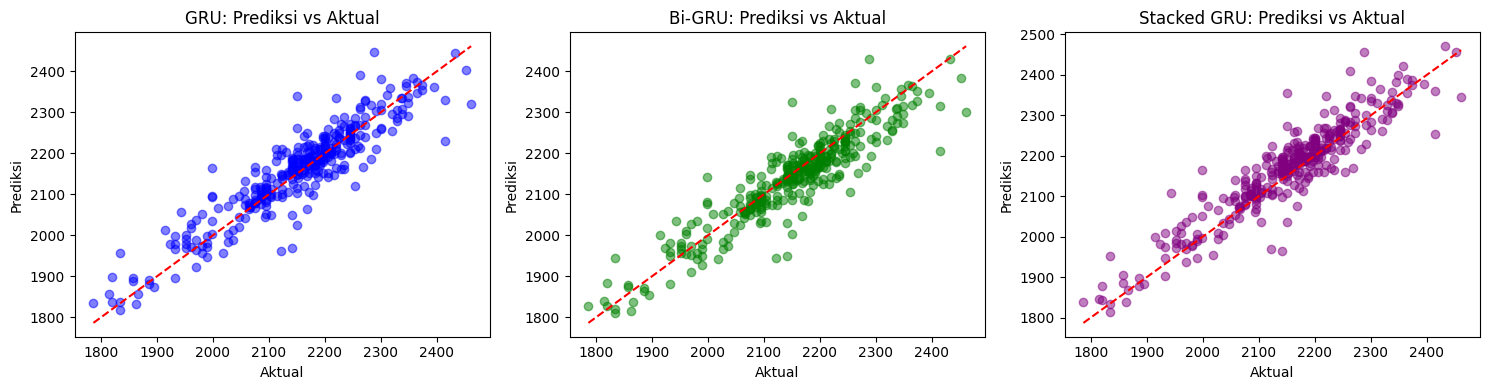

In [21]:
plt.figure(figsize=(15, 4))

# GRU
plt.subplot(1, 3, 1)
plt.scatter(y_true_inv, y_pred_gru_inv, alpha=0.5, color='blue')
plt.plot([y_true_inv.min(), y_true_inv.max()], [y_true_inv.min(), y_true_inv.max()], 'r--')
plt.title("GRU: Prediksi vs Aktual")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")

# Bi-GRU
plt.subplot(1, 3, 2)
plt.scatter(y_true_inv, y_pred_bigru_inv, alpha=0.5, color='green')
plt.plot([y_true_inv.min(), y_true_inv.max()], [y_true_inv.min(), y_true_inv.max()], 'r--')
plt.title("Bi-GRU: Prediksi vs Aktual")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")

# Stacked GRU
plt.subplot(1, 3, 3)
plt.scatter(y_true_inv, y_pred_stacked_inv, alpha=0.5, color='purple')
plt.plot([y_true_inv.min(), y_true_inv.max()], [y_true_inv.min(), y_true_inv.max()], 'r--')
plt.title("Stacked GRU: Prediksi vs Aktual")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")

plt.tight_layout()
plt.show()


Berdasarkan visualisasi, model Stacked GRU menunjukkan akurasi prediksi terbaik dibanding GRU dan Bi-GRU, dengan sebaran titik yang paling mendekati garis diagonal. Bi-GRU juga menunjukkan performa lebih baik dari GRU, berkat kemampuannya memproses data dua arah. Secara keseluruhan, Stacked GRU terbukti paling efektif dalam memprediksi harga saham PT.XLSMART TELECOM